## Evaluation

PSNR, SSIM, visualize check

In [1]:
import os 

import numpy as np
import matplotlib.pyplot as plt

import h5py


import sys
sys.path.append('../')

from module.datasets import load_4d_dicom
from module.utils import display_image_in_detail, calculate_metrics

# from skimage.metrics import peak_signal_noise_ratio as cal_psnr
# from skimage.metrics import structural_similarity as cal_ssim

## Load noisy data and denoised data

## load noisy data

In [2]:
with h5py.File('../dataset/preprocessed/PT_20p 150_120 OSEM_gauss_0.009.h5', 'r') as f:
    noisy_data = f['dataset'][...]
    restore_info = f['restore_info'][...]


# denormalized 
print(restore_info)

mean_val = 201.12048776036573
std_val = 1412.4139804758772
max_val = 23.05689405684542
min_val = -23.34168377224119


noisy_data = noisy_data * (max_val - min_val) + min_val
noisy_data = noisy_data * std_val + mean_val

noisy_data = np.clip(noisy_data, np.iinfo(np.int16).min, np.iinfo(np.int16).max).astype(np.int16)

# 
print(f"noisy_data: {noisy_data.dtype} shape: {noisy_data.shape}; range({np.min(noisy_data)}, {np.max(noisy_data)}); mean:{np.mean(noisy_data)}; std:{np.std(noisy_data)}")

b'{"mean": 201.12048776036573, "std": 1412.4139804758772, "min": -23.34168377224119, "max": 23.05689405684542}'
noisy_data: int16 shape: (24, 71, 192, 192); range(-32768, 32767); mean:200.9238672072401; std:1530.3175702236847


## load denoised data

In [3]:
denoised_data_folder = "../dataset/denoised/BM4D/PT_20p 150_120 OSEM_gauss_0.009/"

denoised_data = load_4d_dicom(denoised_data_folder)

print(f"denoised_data: {denoised_data.dtype} shape:{denoised_data.shape} range({np.min(denoised_data)}, {np.max(denoised_data)}); mean:{np.mean(denoised_data)}; std:{np.std(denoised_data)}")

denoised_data: int16 shape:(24, 71, 192, 192) range(-32768, 32767); mean:200.72938793104765; std:1406.5552662283746


## Visualize check

calculate_metrics running: 0.035202400002162904 second
PSNR: 41.26543486752261; SSIM: 0.9148355822476776; MAE: 449.98174370659723; BRISQUE: 54.103629194955914


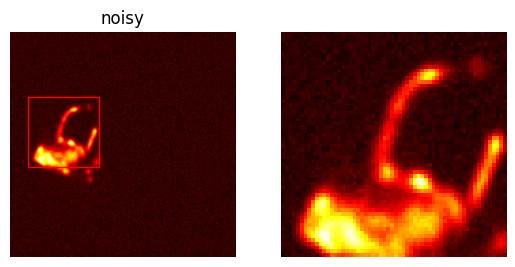

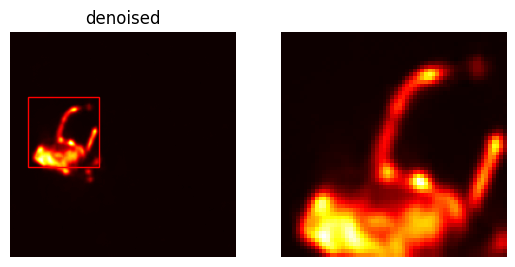

In [5]:
%matplotlib inline

#
time_idx = 11
depth_idx = 38

noisy_image = noisy_data[time_idx, depth_idx]
denoised_image = denoised_data[time_idx, depth_idx]


#
psnr_values, ssim_values, mae_values, brisque_values = calculate_metrics(denoised_image, noisy_image, data_range=65535)

print(f"PSNR: {np.mean(psnr_values)}; SSIM: {np.mean(ssim_values)}; MAE: {np.mean(mae_values)}; BRISQUE: {np.mean(brisque_values)}")


# display image(s) in detail
zoom_coordinates = (55, 15, 60, 60)
display_image_in_detail(noisy_image, zoom_coordinates, title='noisy')
display_image_in_detail(denoised_image, zoom_coordinates, title='denoised')

## Calculate PSNR, SSIM, and MAE

In [6]:
psnr_values, ssim_values, mae_values, brisque_values = calculate_metrics(denoised_data, noisy_data, data_range=65535)
print(f"PSNR:{np.nanmean(psnr_values)}; SSIM:{np.nanmean(ssim_values)}; MAE:{np.nanmean(mae_values)}; BRISQUE: {np.nanmean(brisque_values)}")

calculate_metrics running: 38.38813800000935 second
PSNR:41.25919855724722; SSIM:0.9142890376815566; MAE:451.65022471253303; BRISQUE: 54.81212629112524
